In [1]:
# import sys
# !{sys.executable} -m pip install matplotlib

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})

In [2]:
def timespacing_var_to_array(var, dt):
    L = 5e-3
    vars = np.array(['cmts', 'ch2', 'chcl','d','phi','xi'])
#          var_index= 0       1      2      3   4     5
    var_index = var
    which_var = str(vars[var_index])
    
    with open(r'/Users/jjmarzia/Desktop/cvisim/dt_spacing/jul27-dt/'+which_var+'/a1_'+str(dt)+'.txt','r') as file:
        data = file.read().split(' ')
        # print(data)
        i=0
        for i in range(len(data)):
            if '\n' in data[i]:
                data[i] = data[i].replace('\n', '')
            i=i+1
        # print(data)
        data = [i for i in data if i]
        data = np.array(data)
        data = data.astype(float)
        datai = data*3.1666666667
        data = np.sqrt(datai)*0.0000527046276695*2 #conversion from xi to phi (sqrt(xi)*RVE = rp, rp*2 = phi)
    # if var_index == 5:
        return np.linspace(0,L, 28), data, which_var
    # else:
    #     return np.linspace(0,L, dt), data, which_var

In [3]:
def calc_norm(var, coarsenz, finenz):

    
    coarse_grid = timespacing_var_to_array(var, coarsenz)
    if var==5:
        fine_grid = timespacing_var_to_array(var, finenz)
    else:
        fine_grid = fit_points(var, coarsenz, finenz)
    norm_c_f = np.linalg.norm(fine_grid[1]-coarse_grid[1], np.inf)
    return norm_c_f

0.3708755895974641


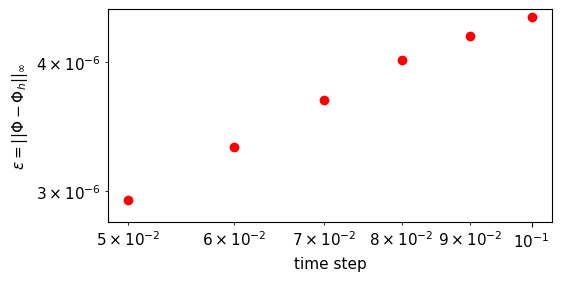

In [17]:
vartemp = 5 #xi

z = timespacing_var_to_array(vartemp, 0.002)
a1 = timespacing_var_to_array(vartemp, 0.05)
a2 = timespacing_var_to_array(vartemp, 0.06)
a3 = timespacing_var_to_array(vartemp, 0.07)
a4 = timespacing_var_to_array(vartemp, 0.08)
a5 = timespacing_var_to_array(vartemp, 0.09)
a6 = timespacing_var_to_array(vartemp, 0.1)
b1 = timespacing_var_to_array(vartemp, 10)
b2 = timespacing_var_to_array(vartemp, 20)
b3 = timespacing_var_to_array(vartemp, 30)

norm_z_a1 = np.linalg.norm(z[1]-a1[1], np.inf)
norm_z_a2 = np.linalg.norm(z[1]-a2[1], np.inf)
norm_z_a3 = np.linalg.norm(z[1]-a3[1], np.inf)
norm_z_a4 = np.linalg.norm(z[1]-a4[1], np.inf)
norm_z_a5 = np.linalg.norm(z[1]-a5[1], np.inf)
norm_z_a6 = np.linalg.norm(z[1]-a6[1], np.inf)
norm_z_b1 = np.linalg.norm(z[1]-b1[1], np.inf)
norm_z_b2 = np.linalg.norm(z[1]-b2[1], np.inf)
norm_z_b3 = np.linalg.norm(z[1]-b3[1], np.inf)

# norms = np.array([norm_z_a1, norm_z_a2, norm_z_a3, norm_z_a4, norm_z_a5, norm_z_a6, norm_z_b1, norm_z_b2, norm_z_b3])
# nzs = np.array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 10, 20, 30])
norms = np.array([norm_z_a1, norm_z_a2, norm_z_a3, norm_z_a4, norm_z_a5, norm_z_a6])
nzs = np.array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

hs = 1/nzs
fig, ax = plt.subplots(figsize = (5.5,2.7), layout='constrained')
plt.scatter(nzs, norms,color='red')

ax.set_xscale("log")
ax.set_yscale("log")
# plt.xlim(4.8e-2,1.1e-1)
plt.ylim(2.8e-6, 4.5e-6)

# plt.xlabel(r'time step $\times \ 10^{-2}$')
plt.xlabel('time step')
plt.ylabel(r'$\epsilon=||\Phi-\Phi_h||_\infty$')
# plt.grid(True)

norm_slope = (norm_z_a3-norm_z_a2)/(0.07-0.06)
# norm_slope = (norm_z_n-norm_z_a1)/(100-10e-2)
# print(norm_z_a2)
print(norm_slope/100e-6)

plt.savefig('dt_loglog.svg', dpi=220,bbox_inches='tight')
plt.savefig('dt_loglog.pdf', dpi=220,bbox_inches='tight')

In [5]:
# fig, ax = plt.subplots(figsize = (5.8,2.7), layout='constrained')
# ax.set_xscale("log")
# ax.set_yscale("log")

# a = calc_all_norms(5, 0.1)
# plt.scatter(a[0],a[1],color='red')
# plt.grid(True)
# # plt.ylim(1e-4,1e-1)
# # plt.xlim(1e-4, 1e-1)

# print('norm_slope =',a[2])


# plot_all_grids()

In [6]:
# plot_all_vars()

In [7]:
# def fit_points(var, coarsenz, finenz):
#     coarse_grid = timespacing_var_to_array(var, coarsenz)
#     fine_grid = timespacing_var_to_array(var, finenz)

#     c_in_f = np.around(np.linspace(0,finenz-1,coarsenz))
#     # print(c_in_f)
#     f_c = []
#     q=0
#     for q in range(len(c_in_f)):
#         f_c = np.append(f_c, fine_grid[1][round(c_in_f[q])])
#         q+=1
#     return f_c

In [8]:
# def plot_alldt(var):
#     fig, ax = plt.subplots(figsize = (5.5,2.7), layout='constrained')

#     # dts = np.array(['0.1', '0.5', '1', '2.5', '5', '7.5', '10', '25', '50', '100'])
#     # dts = np.array([0.001, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
#     dts = np.array([10, 20, 30])
#     dts = dts[::-1]
#     i=0
#     for i in range(len(dts)):
#         fsol = timespacing_var_to_array(var,dts[i])
#         # plt.plot(fsol[0], fsol[1],label=str(fsol[2])+' dt '+str(dts[i]))
#         plt.plot(fsol[0], fsol[1],label=r'$\Delta t =$'+str(dts[i]))
#         i = i+1

#     plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
#     plt.grid(True)
#     # plt.ylim([0,1])

In [9]:
# plot_alldt(5)
# plt.xlim([0,0.005])
# plt.ylim([0,0.5])
# plt.ylabel(r'$\xi$')
# plt.xlabel(r'z')

# plt.savefig('dtall_combined.pdf', dpi=220,bbox_inches='tight')
# plt.savefig('dtall_combined.svg', dpi=220,bbox_inches='tight')

In [10]:
# def plot_all_vars():
#     plot_alldt(0)
#     plt.ylim([0,2])
#     plot_alldt(1)
#     plt.ylim([0,2])
#     plot_alldt(2)
#     plt.ylim([0,2])
#     plot_alldt(3)
#     plt.ylim([0,50e-6])
#     plot_alldt(4)
#     plt.ylim([0,100e-6])
#     plot_alldt(5)
#     plt.ylim([0,1])

In [11]:
# def calc_all_norms(var, finenz):
#     nzs = np.array([50, 25, 10, 7.5, 5, 2.5, 1, 0.5, 0.1])
#     hs = 1/nzs
#     n0 = calc_norm(var, nzs[0], finenz)
#     n1 = calc_norm(var, nzs[1], finenz)
#     n2 = calc_norm(var, nzs[2], finenz)
#     n3 = calc_norm(var, nzs[3], finenz)
#     n4 = calc_norm(var, nzs[4], finenz)
#     n5 = calc_norm(var, nzs[5], finenz)
#     n6 = calc_norm(var, nzs[6], finenz)
#     n7 = calc_norm(var, nzs[7], finenz)
#     n8 = calc_norm(var, nzs[8], finenz)
#     norms = np.array([n0, n1, n2, n3, n4, n5, n6, n7, n8])
#     norm_slope = (n8-n0)/(hs[len(hs)-1]-hs[0])
#     return hs, norms, norm_slope
